In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
import requests_cache

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')

# just add headers to your session and provide it to the reader
session.headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',     'Accept': 'application/json;charset=utf-8'}


df=web.DataReader('TSLA', data_source='yahoo', start='2010-01-29', end='2022-1-28', session=session)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2022-01-24,933.510010,851.469971,904.760010,930.000000,50791700.0,930.000000
2022-01-25,951.260010,903.210022,914.200012,918.400024,28865300.0,918.400024
2022-01-26,987.690002,906.000000,952.429993,937.409973,33425700.0,937.409973


In [3]:
print(max(df['Close']))

1229.9100341796875


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2918 entries, 2010-06-29 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2918 non-null   float64
 1   Low        2918 non-null   float64
 2   Open       2918 non-null   float64
 3   Close      2918 non-null   float64
 4   Volume     2918 non-null   float64
 5   Adj Close  2918 non-null   float64
dtypes: float64(6)
memory usage: 159.6 KB


In [5]:
df['Date']=df.index
df=df.reset_index(drop=True)
df

,High,Low,Open,Close,Volume,Adj Close,Date
0,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000,2010-06-29
1,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000,2010-06-30
2,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000,2010-07-01
3,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000,2010-07-02
4,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000,2010-07-06
...,...,...,...,...,...,...,...
2913,933.510010,851.469971,904.760010,930.000000,50791700.0,930.000000,2022-01-24
2914,951.260010,903.210022,914.200012,918.400024,28865300.0,918.400024,2022-01-25
2915,987.690002,906.000000,952.429993,937.409973,33425700.0,937.409973,2022-01-26
2916,935.390015,829.000000,933.359985,829.099976,48475400.0,829.099976,2022-01-27


In [6]:
headers=list(df.columns)
headers

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Date']

In [7]:
headers=headers[-1:]+headers[:-1]
headers

['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [8]:
df=df[headers]
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...,...
2913,2022-01-24,933.510010,851.469971,904.760010,930.000000,50791700.0,930.000000
2914,2022-01-25,951.260010,903.210022,914.200012,918.400024,28865300.0,918.400024
2915,2022-01-26,987.690002,906.000000,952.429993,937.409973,33425700.0,937.409973
2916,2022-01-27,935.390015,829.000000,933.359985,829.099976,48475400.0,829.099976


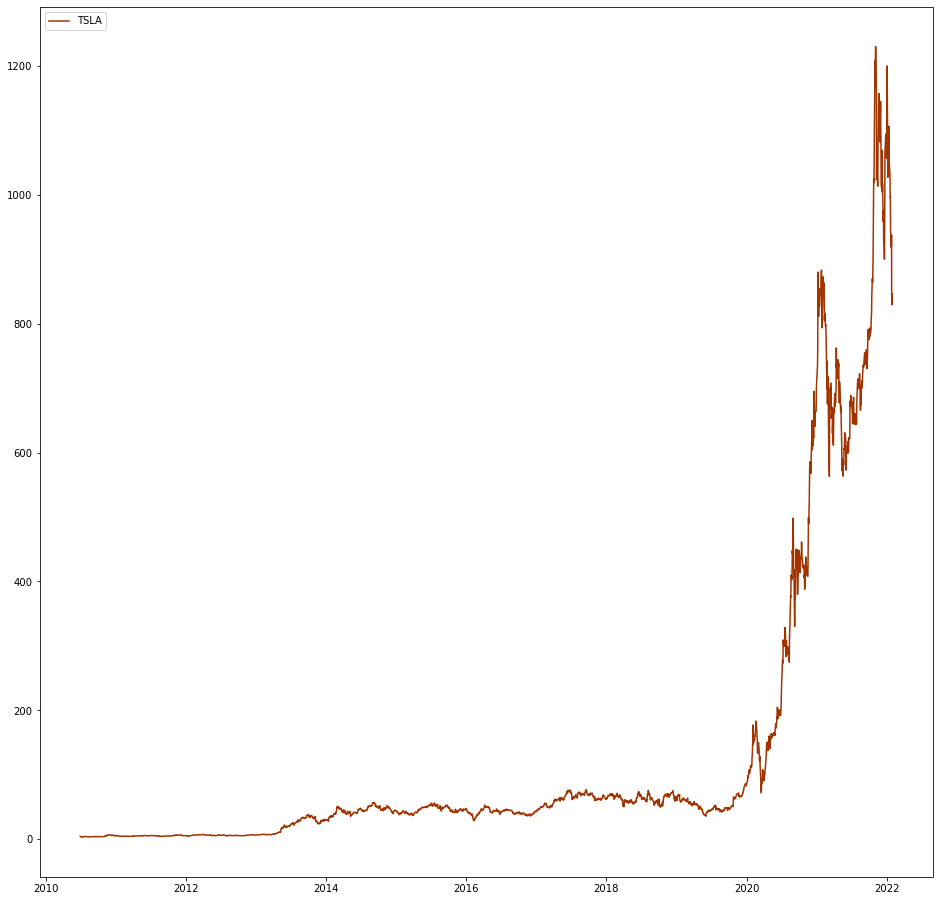

In [9]:
plt.figure(figsize=(16,16))
plt.plot(df['Date'], df['Close'], label='TSLA', color='#A23400')
plt.legend(loc='upper left')
plt.show()

In [10]:
data=df[['Close']]
dataset=np.array(data)
type(dataset)
training_data_len=int(len(dataset)*0.8)
training_data_len

2334

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.76156507],
       [0.67327487],
       [0.68733642]])

In [12]:
train_data=scaled_data[:training_data_len, :]
train_data.shape

(2334, 1)

In [13]:
x_train=[]
y_train=[]
for i in range(100, training_data_len):
    x_train.append(train_data[i-100:i, :])
    y_train.append(train_data[i, :])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape

(2234, 100, 1)

In [15]:
model=Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=False))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=2, epochs=10)

Epoch 1/10
  92/2234 [>.............................] - ETA: 1:27 - loss: 1.2435e-04

KeyboardInterrupt: 

In [18]:
y_train.shape

(2234, 1)